## Medical Insureance cost Prediction Assignment

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix


## Data import and understanding of the data

In [2]:
medical_insu_cost_df = pd.read_excel(r"C:\Users\rawat\Downloads\Data_science_IIT_Guwahati\machine_learning\Supervised_learning\mini_project_medical_insurance\Medical Insurance cost prediction.xlsm")

In [3]:
medical_insu_cost_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
print(medical_insu_cost_df.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [5]:
medical_insu_cost_df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data cleaning

In [6]:
medical_insu_cost_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
medical_insu_cost_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

In [8]:
print(medical_insu_cost_df[medical_insu_cost_df.duplicated(keep=False)])

     age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631
581   19  male  30.59         0     no  northwest  1639.5631


In [9]:
new_med_df=medical_insu_cost_df.drop(index=581)

## Data Statistics

In [10]:
new_med_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [11]:
new_med_df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


Summary statistics:
All customemrs are 18 to 64 years old. Average age of a customer is 39 years.
75% of the customer are below 51 years old and having 2 childern.
The insurace charges are higher for high bmi customers. 75% of the customers are paying charges 16640 or below. 50% of the custommers are paying $9386.
Age and charges are having higher standard deviation, they are rightly skewed.

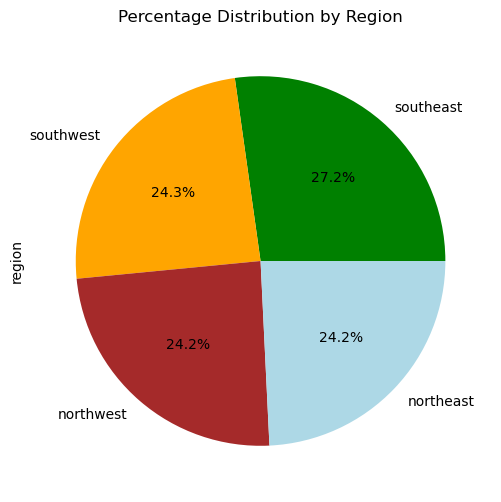

In [12]:
#Percentage Distribution by region
colors = ['green', 'orange', 'brown','lightblue']
# Create pie chart
plt.figure(figsize=(6, 6))
new_med_df['region'].value_counts().plot.pie(colors=colors, autopct='%1.1f%%')
plt.title('Percentage Distribution by Region')
plt.show()

Highest customers are from southwest region.

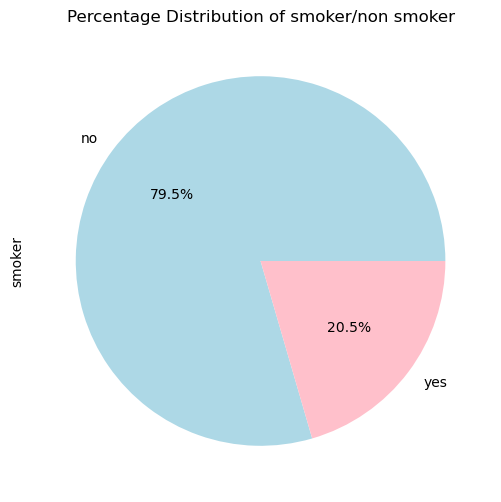

In [13]:
#Percentage Distribution of smokers/non smokers
colors = ['lightblue', 'pink']
# Create pie chart
plt.figure(figsize=(6, 6))
new_med_df['smoker'].value_counts().plot.pie(colors=colors, autopct='%1.1f%%')
plt.title('Percentage Distribution of smoker/non smoker')
plt.show()

80% customers are non smoker.

## Univariate Analysis

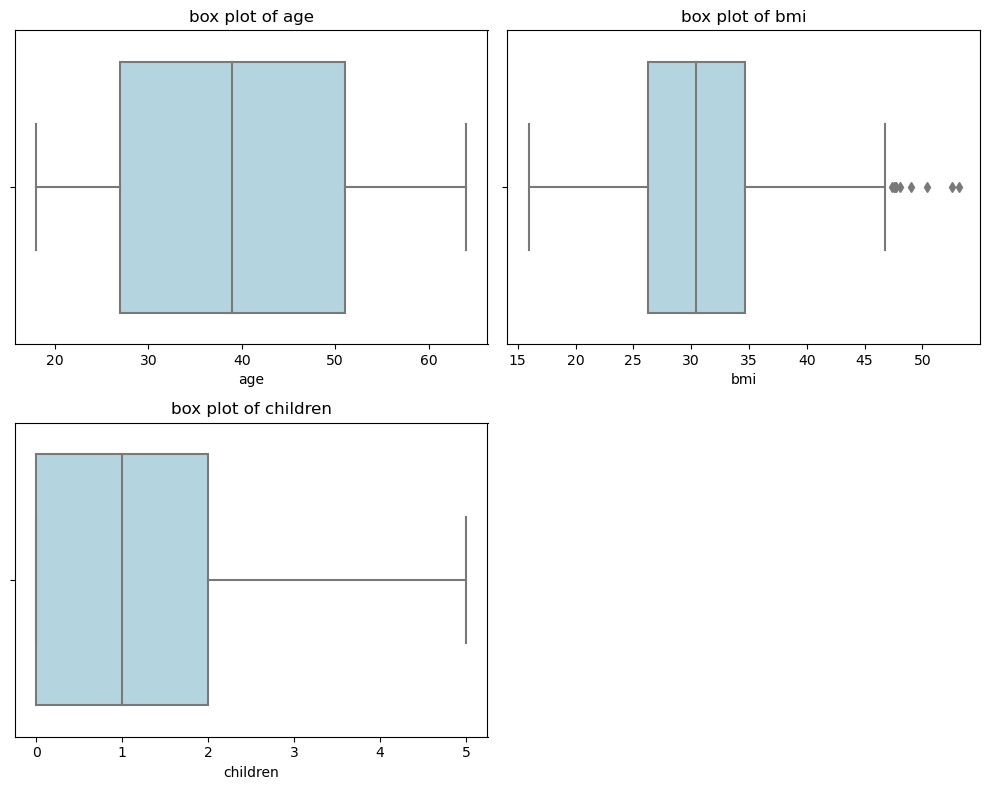

In [14]:
numerical_cols = new_med_df.select_dtypes(include=['int64','float64']).columns.tolist()
numerical_cols.remove("charges")
num_cols = len(numerical_cols)
#layout
cols=2
rows = math.ceil(num_cols/cols)
# plot
plt.figure(figsize=(10,8))

for i, col in enumerate(numerical_cols,1):
    plt.subplot(rows,cols, i)
    sns.boxplot(x=new_med_df[col], color='lightblue')
    plt.title(f'box plot of {col}')
plt.tight_layout()
plt.show()


bmi data has the outliers so treating outliers using iqr method below.

In [15]:
outliers_columns = new_med_df.select_dtypes(include='number').columns.difference(['age', 'children','charges'])

def cap_outliers_iqr (df,columns):
    all_outliers={}
    for col in columns:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR = Q3-Q1

        lower_bound = Q1-1.5*IQR
        upper_bound = Q1+1.5*IQR
        
        outliers = df[(df[col]<lower_bound) | (df[col]>upper_bound)]
        total_outliers = outliers.shape[0]
        all_outliers[col] = total_outliers
        print(f"\n Capping column '{col}' | Lower:{lower_bound: .2f}, Upper: {upper_bound: .2f}")
        print(f"Total outliers in '{col}': {total_outliers}")
        
        df[col]=df[col].apply(lambda x: lower_bound if x<lower_bound else upper_bound if x>upper_bound else x)
    return df,all_outliers

new_med_df, outliers_dict = cap_outliers_iqr(new_med_df, outliers_columns)


 Capping column 'bmi' | Lower: 13.67, Upper:  38.91
Total outliers in 'bmi': 129


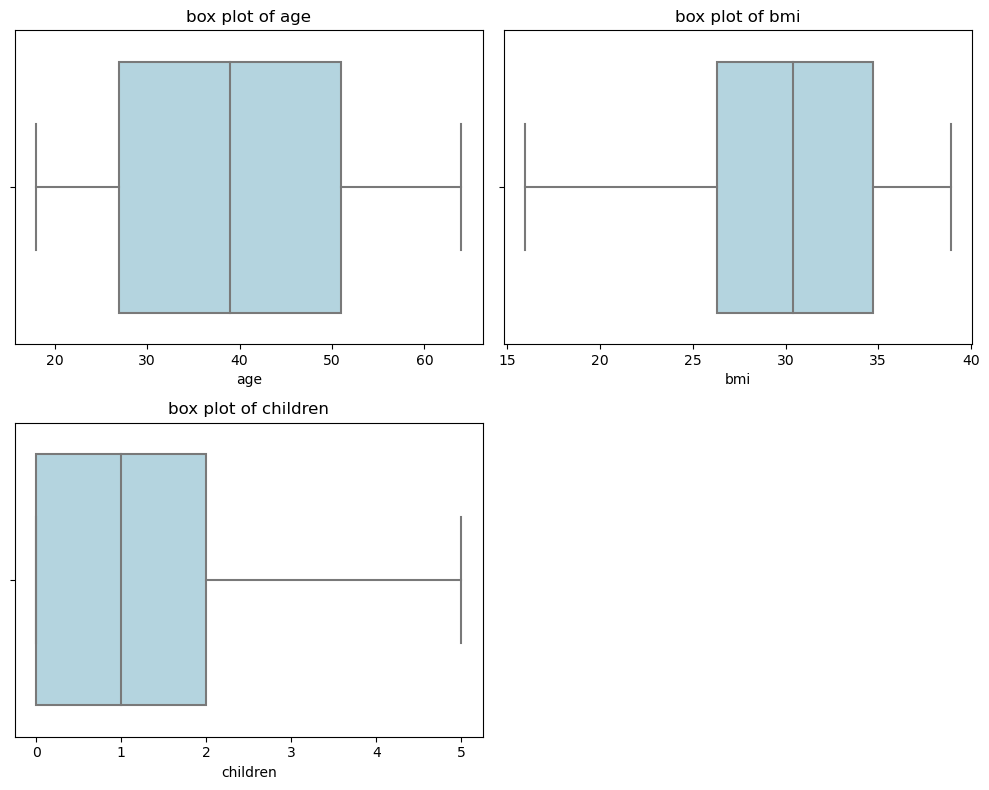

In [16]:
numerical_cols = new_med_df.select_dtypes(include=['int64','float64']).columns.tolist()
numerical_cols.remove("charges")
num_cols = len(numerical_cols)
#layout
cols=2
rows = math.ceil(num_cols/cols)
# plot
plt.figure(figsize=(10,8))

for i, col in enumerate(numerical_cols,1):
    plt.subplot(rows,cols, i)
    sns.boxplot(x=new_med_df[col], color='lightblue')
    plt.title(f'box plot of {col}')
plt.tight_layout()
plt.show()

Using Dist plot to see the distribution of each feature, and skewness of each feature

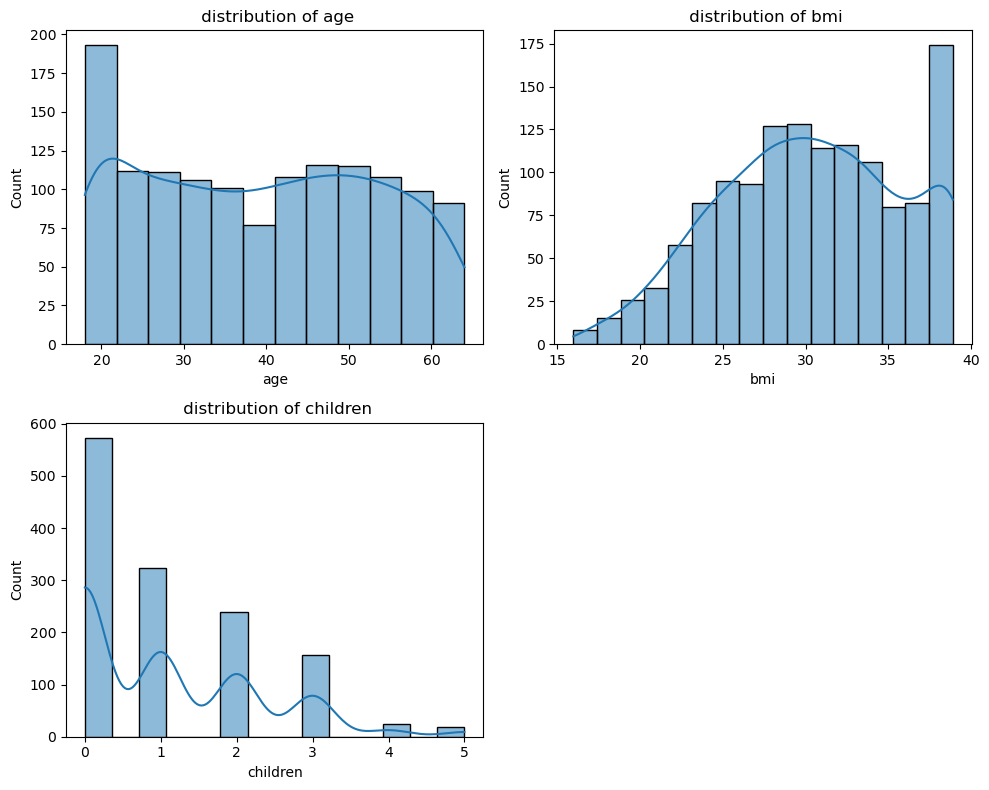

In [17]:
numerical_cols = new_med_df.select_dtypes(include=['int64','float64']).columns.tolist()
numerical_cols.remove("charges")
num_cols = len(numerical_cols)
#layout
cols=2
rows = math.ceil(num_cols/cols)
# plot
plt.figure(figsize=(10,8))

for i, col in enumerate(numerical_cols,1):
    plt.subplot(rows,cols, i)
    sns.histplot(data=new_med_df, x=col, kde=True)
    plt.title(f' distribution of {col}')
plt.tight_layout()
plt.show()

In [18]:
from scipy.stats import skew

# calculate skewness of each numerical values
skewness_values = new_med_df[numerical_cols].apply(skew)

# definning skewness category
def skew_category(x):
    if abs(x)<0.5:
        return "Symmetric"
    elif 0.5<abs(x)<1:
        return "Moderately Skewed"
    else:
        return "highly Skewed"
    
# create a summary Dataframe
summary_dict = {
    "skewness_values":skewness_values,
    "skew_category":skewness_values.apply(skew_category),
    "Direction": skewness_values.apply(lambda x: "Positive (Right)" if x>0 else "Negative(left)")
}
skewness_summary = pd.DataFrame(summary_dict)

print("skewness of numerical features in mobile_df:\n")
print(skewness_summary)


skewness of numerical features in mobile_df:

          skewness_values      skew_category         Direction
age              0.054719          Symmetric  Positive (Right)
bmi             -0.161220          Symmetric    Negative(left)
children         0.936369  Moderately Skewed  Positive (Right)


As the data is not highly skewed, so we are not treating the skewness.

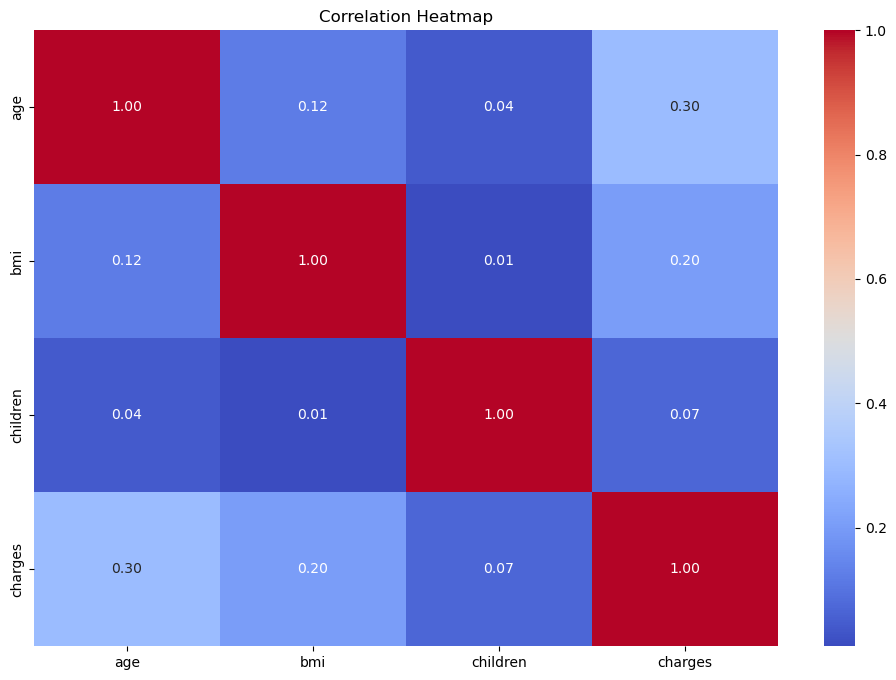

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(new_med_df.corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

charges are highly correlated to the age and bmi compared to children.

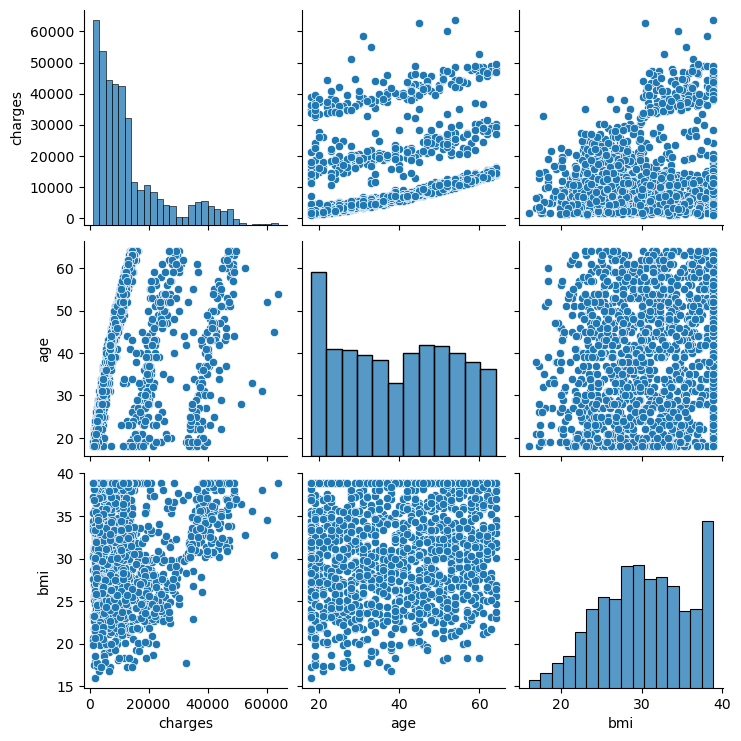

In [20]:
selected_columns = ['charges', 'age', 'bmi']
sns.pairplot(new_med_df[selected_columns])
plt.show()

## Feature Engineering & Preprocessing

In [21]:
# Encode categorical variables (sex, smoker, region), I am using onehot encoding as this data is not ordered.

In [22]:
encoded_df  = pd.get_dummies(new_med_df,columns=['sex','smoker','region'],drop_first=True)
encoded_df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [23]:
# feature scaling of numerical columns
from sklearn.preprocessing import StandardScaler
numerical_cols = new_med_df.select_dtypes(include=['int64','float64']).columns.tolist()
numerical_cols.remove("charges")
scaled_df = encoded_df.copy()
scaler=StandardScaler()
scaled_df[numerical_cols] = scaler.fit_transform(scaled_df[numerical_cols])
scaled_df


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.440418,-0.446721,-0.909234,16884.92400,0,1,0,0,1
1,-1.511647,0.618432,-0.079442,1725.55230,1,0,0,1,0
2,-0.799350,0.478710,1.580143,4449.46200,1,0,0,1,0
3,-0.443201,-1.389391,-0.909234,21984.47061,1,0,1,0,0
4,-0.514431,-0.268893,-0.909234,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,0.767704,0.110352,1.580143,10600.54830,1,0,1,0,0
1334,-1.511647,0.282737,-0.909234,2205.98080,0,0,0,0,0
1335,-1.511647,1.177320,-0.909234,1629.83350,0,0,0,1,0
1336,-1.297958,-0.827781,-0.909234,2007.94500,0,0,0,0,1


## Train test split

In [24]:
from sklearn.model_selection import cross_val_score, train_test_split

train_df, test_df = train_test_split(scaled_df,train_size=0.75, random_state=42)


In [25]:
train_df.head(2)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
763,-0.870580,-0.786046,-0.909234,3070.8087,1,0,0,0,0
1079,1.693691,0.598472,1.580143,15161.5344,1,0,0,1,0


In [26]:
test_df.head(2)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
900,0.696474,-1.423868,-0.909234,8688.85885,1,0,0,0,0
1064,-0.728120,-0.864073,2.409936,5708.86700,0,0,0,0,1


In [27]:
x_train = train_df.drop(['charges'], axis=1)
y_train = train_df['charges']
x_test = test_df.drop(['charges'],axis=1)
y_test = test_df['charges']

In [28]:
x_train.head(2)

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
763,-0.870580,-0.786046,-0.909234,1,0,0,0,0
1079,1.693691,0.598472,1.580143,1,0,0,1,0


In [29]:
x_test.head(2)

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
900,0.696474,-1.423868,-0.909234,1,0,0,0,0
1064,-0.728120,-0.864073,2.409936,0,0,0,0,1


In [30]:
y_train

763      3070.8087
1079    15161.5344
178      8823.2790
287     14256.1928
1290     7133.9025
           ...    
1096    44641.1974
1131     3693.4280
1295     1964.7800
861      7151.0920
1127     5836.5204
Name: charges, Length: 1002, dtype: float64

In [31]:
y_test

900      8688.85885
1064     5708.86700
1256    11436.73815
298     38746.35510
237      4463.20510
           ...     
1014     5383.53600
669      6500.23590
1109     8605.36150
788      5209.57885
1192    13019.16105
Name: charges, Length: 335, dtype: float64

In [32]:
# Building the models

import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Define models
models = {
    'Linear': LinearRegression(),
    'L1 (Lasso)': Lasso(alpha=0.1),
    'L2 (Ridge)': Ridge(alpha=0.1),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'Support Vector (SVR)': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(),
    'XGBoost': XGBRegressor(),
    'CatBoost': CatBoostRegressor(verbose=0),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

# Store results in a list
results = []
###  r2 and adj r2 score parameters
n_train = x_train.shape[0]
n_test = x_test.shape[0]
p = x_train.shape[1]
# Evaluate the model
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # Calculate R² scores first
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    MAE_train = mean_absolute_error(y_train, y_pred_train)
    MAE_test = mean_absolute_error(y_test, y_pred_test)
    RMSE_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    RMSE_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    relative_diff = ((RMSE_test - RMSE_train) / RMSE_train) * 100
    results.append({
        'Model': name,
        'R² Train': r2_train,
        #'Adjusted R² Train': 1 - (1 - r2_train) * (n_train - 1) / (n_train - p - 1),
        'R² Test': r2_test,
        #'Adjusted R² Test': 1 - (1 - r2_test) * (n_test - 1) / (n_test - p - 1),     
        'MAE Train': MAE_train,
        'MAE Test': MAE_test,
        'RMSE Train': RMSE_train,
        'RMSE Test': RMSE_test,
        'Relative_diff' : relative_diff,

    })
# Convert to DataFrame
results_df = pd.DataFrame(results)

#If relative difference > 10–20%, you can consider the model overfitting.

relative_diff = ((RMSE_test - RMSE_train) / RMSE_train) * 100
results_df['Overfitting Flag'] = results_df['Relative_diff'].apply(lambda x: 'Yes' if x > 20 else 'No')

# Round for better readability
results_df = results_df.round(3)

In [33]:
print(results_df.to_string(index=False))

               Model  R² Train  R² Test  MAE Train  MAE Test  RMSE Train  RMSE Test  Relative_diff Overfitting Flag
              Linear     0.733    0.795   4258.731  4146.726    6064.276   5956.377         -1.779               No
          L1 (Lasso)     0.733    0.795   4258.742  4146.750    6064.276   5956.459         -1.778               No
          L2 (Ridge)     0.733    0.795   4259.528  4148.151    6064.279   5957.661         -1.758               No
          ElasticNet     0.697    0.732   4688.846  4838.836    6456.024   6812.307          5.519               No
Support Vector (SVR)    -0.103   -0.119   8128.834  8902.647   12318.692  13912.866         12.941               No
       Decision Tree     0.999    0.723     21.489  3238.101     343.626   6920.003       1913.821              Yes
       Random Forest     0.975    0.869   1047.142  2664.200    1869.947   4762.471        154.685              Yes
   Gradient Boosting     0.894    0.885   2095.684  2546.539    3817.244

To determine which model is better, we compare models based on:

R² Test / Adjusted R² Test: Higher is better (closer to 1) MAE Test (Mean Absolute Error): Lower is better RMSE Test (Root Mean Squared Error): Lower is better Avoiding overfitting: High train score with low test score means overfit.

✅ Decision Tree, Random Forest, catboost and XG boost shows good R2 train but R2 test varies from r2 test, which clearly indicates overfitting.


## Hyperparameter tuning using Random search CV on the selected models

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from scipy.stats import randint, uniform

In [43]:
rf = RandomForestRegressor(random_state=42)

rf_param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_random = RandomizedSearchCV(
    rf,
    param_distributions=rf_param_dist,
    n_iter=50,
    scoring='neg_root_mean_squared_error',
    cv=5,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

rf_random.fit(x_train, y_train)
print("Random Forest Best Params:", rf_random.best_params_)
print("Random Forest Hypertuning Test RMSE:", mean_squared_error(y_test, rf_random.predict(x_test), squared=False).round(3))
print("Random Forest Hypertuning Test R2 score:", r2_score(y_test, rf_random.predict(x_test)).round(3))
print("Random Forest Hypertuning Train R2 score:", r2_score(y_train, rf_random.predict(x_train)).round(3))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Random Forest Best Params: {'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 6, 'min_samples_split': 9, 'n_estimators': 346}
Random Forest Hypertuning Test RMSE: 4381.617
Random Forest Hypertuning Test R2 score: 0.889
Random Forest Hypertuning Train R2 score: 0.865


In [42]:
dt = DecisionTreeRegressor(random_state=42)

dt_param_dist = {
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2', None]
}

dt_random = RandomizedSearchCV(
    dt,
    param_distributions=dt_param_dist,
    n_iter=50,
    scoring='neg_root_mean_squared_error',
    cv=5,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

dt_random.fit(x_train, y_train)
print("Decision Tree Best Params:", dt_random.best_params_)
print("Decision Tree Hypertuning Test RMSE:", mean_squared_error(y_test, dt_random.predict(x_test), squared=False).round(3))
print("Decision Tree Hypertuning Test R2 score:", r2_score(y_test, dt_random.predict(x_test)).round(3))
print("Decision Tree Hypertuning Train R2 score:", r2_score(y_train, dt_random.predict(x_train)).round(3))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Decision Tree Best Params: {'max_depth': 4, 'max_features': None, 'min_samples_leaf': 6, 'min_samples_split': 3}
Decision Tree Hypertuning Test RMSE: 4494.306
Decision Tree Hypertuning Test R2 score: 0.883
Decision Tree Hypertuning Train R2 score: 0.858


In [46]:
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

xgb_param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1),
    'min_child_weight': randint(1, 10)
}

xgb_random = RandomizedSearchCV(
    xgb,
    param_distributions=xgb_param_dist,
    n_iter=50,
    scoring='neg_root_mean_squared_error',
    cv=5,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

xgb_random.fit(x_train, y_train)
print("XGBoost Best Params:", xgb_random.best_params_)
print("XGBoost Hypertuning Test RMSE:", mean_squared_error(y_test, xgb_random.predict(x_test), squared=False).round(3))
print("XGBoost Hypertuning Test R2 score:", r2_score(y_test, xgb_random.predict(x_test)).round(3))
print("XGBoost Hypertuning Train R2 score:", r2_score(y_train, xgb_random.predict(x_train)).round(3))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
XGBoost Best Params: {'colsample_bytree': 0.726768802062511, 'learning_rate': 0.06084782400582775, 'max_depth': 3, 'min_child_weight': 6, 'n_estimators': 157, 'reg_alpha': 0.9300168348108319, 'reg_lambda': 0.0704161308495439, 'subsample': 0.6835674870461441}
XGBoost Hypertuning Test RMSE: 4381.008
XGBoost Hypertuning Test R2 score: 0.889
XGBoost Hypertuning Train R2 score: 0.883


In [67]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint, uniform

# Define the GBR model
gbr = GradientBoostingRegressor(random_state=42)

# Define hyperparameter search space for GBR
gbr_param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2']
}

# RandomizedSearchCV setup
gbr_random = RandomizedSearchCV(
    gbr,
    param_distributions=gbr_param_dist,
    n_iter=50,
    scoring='neg_root_mean_squared_error',
    cv=5,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

# Fit model
gbr_random.fit(x_train, y_train)

# Print evaluation results
print("Gradient Boosting Best Params:", gbr_random.best_params_)
print("GBR Hypertuning Test RMSE:", mean_squared_error(y_test, gbr_random.predict(x_test), squared=False).round(3))
print("GBR Hypertuning Test R2 score:", r2_score(y_test, gbr_random.predict(x_test)).round(3))
print("GBR Hypertuning Train R2 score:", r2_score(y_train, gbr_random.predict(x_train)).round(3))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Gradient Boosting Best Params: {'learning_rate': 0.019915219870164515, 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 229, 'subsample': 0.8123738333268545}
GBR Hypertuning Test RMSE: 4377.905
GBR Hypertuning Test R2 score: 0.889
GBR Hypertuning Train R2 score: 0.872


## Post hypertuning, Gradient Boost test and train r2 square are almost near to each other which shows no overfitting in this model.

In [78]:
xgb_random.best_params_

{'colsample_bytree': 0.726768802062511,
 'learning_rate': 0.06084782400582775,
 'max_depth': 3,
 'min_child_weight': 6,
 'n_estimators': 157,
 'reg_alpha': 0.9300168348108319,
 'reg_lambda': 0.0704161308495439,
 'subsample': 0.6835674870461441}

In [79]:
xgb_random.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.726768802062511, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.06084782400582775,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=6, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=157, n_jobs=None,
             num_parallel_tree=None, ...)

In [80]:
import pickle
import joblib
import os
#model trained with these
final_model = xgb_random.best_estimator_
filename = 'Medical_insurance_prediction.pkl'

if os.path.exists(filename):
    os.remove(filename)
    
joblib.dump(final_model, filename)



['Medical_insurance_prediction.pkl']

In [82]:
import sklearn
print(sklearn.__version__)

1.2.1


In [83]:
# Combine full data if you're retraining for deployment
X_full = pd.concat([x_train, x_test])
scaler = StandardScaler()
scaler.fit(X_full)                      # ✅ Now OK to fit on full data

# Save scaler and model
joblib.dump(scaler, "scaler1.pkl")



['scaler1.pkl']